In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Ames_train.csv")

# Ames Train Data

Goal: The primary objective of this project is to develop a Supervised Learning model designed to predict the value of a house based on selected variables. Given that the target variable is a monetary value, this is can also be classified as a regression supervised model. 

## Exploration and Preprocessing 

In [3]:
data

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,527402250,20,RL,NaN,12537,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,149900
1,923225240,160,RM,41.0,2665,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,127000
2,534178010,20,RL,80.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,COD,Normal,127000
3,905452160,20,RL,75.0,9525,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,128000
4,535376100,30,RL,60.0,5400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml,108480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339,535478090,20,RL,70.0,7000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,2,2006,WD,Normal,105000
2340,528292060,60,RL,41.0,12460,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,225000
2341,531453100,60,RL,NaN,10274,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,162000
2342,905403150,20,RL,85.0,10452,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,155000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2344 non-null   int64  
 1   MS SubClass      2344 non-null   int64  
 2   MS Zoning        2344 non-null   object 
 3   Lot Frontage     1941 non-null   float64
 4   Lot Area         2344 non-null   int64  
 5   Street           2344 non-null   object 
 6   Alley            152 non-null    object 
 7   Lot Shape        2344 non-null   object 
 8   Land Contour     2344 non-null   object 
 9   Utilities        2344 non-null   object 
 10  Lot Config       2344 non-null   object 
 11  Land Slope       2344 non-null   object 
 12  Neighborhood     2344 non-null   object 
 13  Condition 1      2344 non-null   object 
 14  Condition 2      2344 non-null   object 
 15  Bldg Type        2344 non-null   object 
 16  House Style      2344 non-null   object 
 17  Overall Qual  

In [5]:
data_initial = data

## Univariate Analysis: SalePrice

array([[<Axes: title={'center': 'SalePrice'}>]], dtype=object)

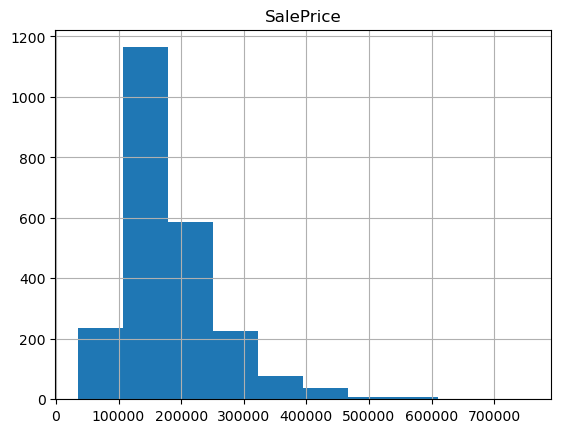

In [6]:
sales_data = data[['SalePrice']].copy()
sales_data.hist()

In [7]:
sales_data.describe()

,SalePrice
count,2344.000000
mean,181036.995307
std,79576.816701
min,34900.000000
25%,129500.000000
50%,161000.000000
75%,213492.500000
max,755000.000000


array([[<Axes: title={'center': 'Overall Qual'}>]], dtype=object)

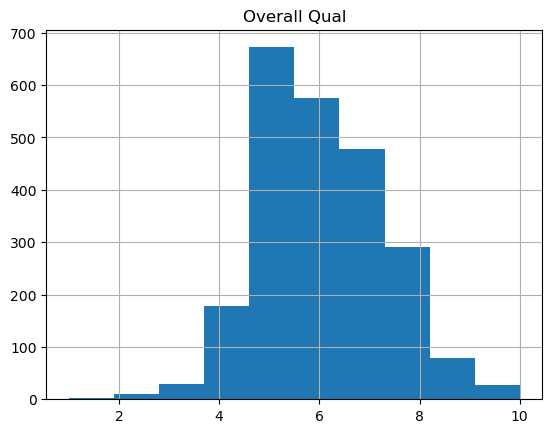

In [8]:
overall_qual_data = data[['Overall Qual']].copy()
overall_qual_data.hist()

In [9]:
overall_qual_data.describe()

,Overall Qual
count,2344.000000
mean,6.095990
std,1.412009
min,1.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,10.000000


## Area Dimensions

In [10]:
#All Area data was grouped here to get understand their correlation to the SalePrice
area_data = data_initial[['Garage Area','Lot Area','Gr Liv Area','Mas Vnr Area','Bsmt Unf SF','Total Bsmt SF','Wood Deck SF','Pool Area','Open Porch SF','SalePrice']].copy()
area_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Garage Area    2343 non-null   float64
 1   Lot Area       2344 non-null   int64  
 2   Gr Liv Area    2344 non-null   int64  
 3   Mas Vnr Area   2324 non-null   float64
 4   Bsmt Unf SF    2343 non-null   float64
 5   Total Bsmt SF  2343 non-null   float64
 6   Wood Deck SF   2344 non-null   int64  
 7   Pool Area      2344 non-null   int64  
 8   Open Porch SF  2344 non-null   int64  
 9   SalePrice      2344 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 183.3 KB


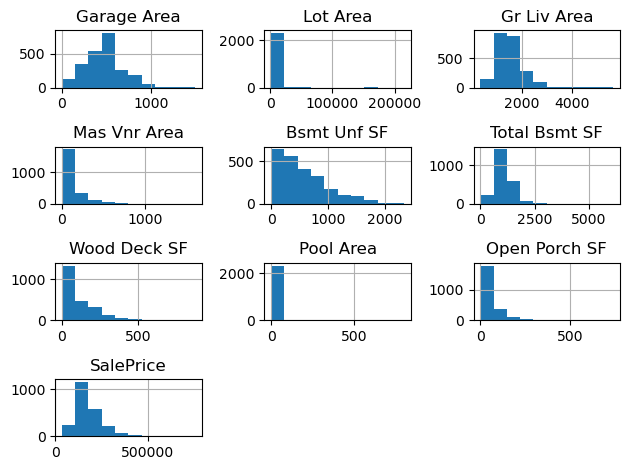

In [11]:
#We try to explore the data further and see the distribution across each variable
area_data.hist()
plt.tight_layout()

In [12]:
area_data.describe()

,Garage Area,Lot Area,Gr Liv Area,Mas Vnr Area,Bsmt Unf SF,Total Bsmt SF,Wood Deck SF,Pool Area,Open Porch SF,SalePrice
count,2343.000000,2344.000000,2344.000000,2324.000000,2343.000000,2343.000000,2344.000000,2344.000000,2344.000000,2344.000000
mean,472.721297,10167.649317,1498.672782,101.907917,553.666240,1048.931285,93.422782,2.343430,46.946672,181036.995307
std,215.256036,8063.736315,501.594613,178.951048,440.453337,439.982957,124.040278,36.545802,66.952593,79576.816701
min,0.000000,1300.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,322.000000,7475.000000,1126.000000,0.000000,213.000000,789.000000,0.000000,0.000000,0.000000,129500.000000
50%,479.000000,9478.500000,1449.000000,0.000000,459.000000,989.000000,0.000000,0.000000,27.000000,161000.000000
75%,576.000000,11557.750000,1743.000000,163.000000,794.500000,1302.000000,168.000000,0.000000,69.250000,213492.500000
max,1488.000000,215245.000000,5642.000000,1600.000000,2336.000000,6110.000000,870.000000,800.000000,742.000000,755000.000000


<Axes: >

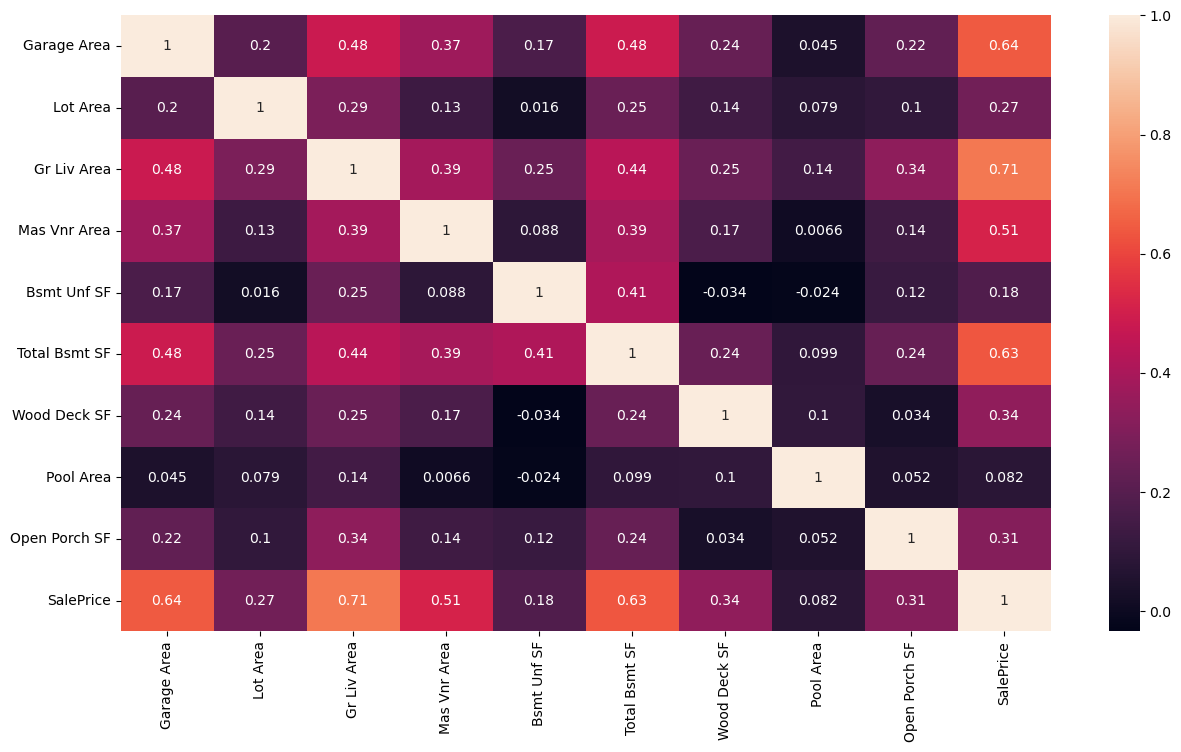

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(area_data.corr(), annot =True)

In [14]:
area_data.fillna(0, inplace=True)
area_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Garage Area    2344 non-null   float64
 1   Lot Area       2344 non-null   int64  
 2   Gr Liv Area    2344 non-null   int64  
 3   Mas Vnr Area   2344 non-null   float64
 4   Bsmt Unf SF    2344 non-null   float64
 5   Total Bsmt SF  2344 non-null   float64
 6   Wood Deck SF   2344 non-null   int64  
 7   Pool Area      2344 non-null   int64  
 8   Open Porch SF  2344 non-null   int64  
 9   SalePrice      2344 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 183.3 KB


 ## Quality and Condtion Dimensions

In [15]:
#All the quality and condition variables were tested
quality_data = data[['Overall Cond', 'Heating QC', 'Kitchen Qual','Overall Qual','Exter Qual','Exter Cond','Garage Qual','SalePrice',]].copy()
quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Overall Cond  2344 non-null   int64 
 1   Heating QC    2344 non-null   object
 2   Kitchen Qual  2344 non-null   object
 3   Overall Qual  2344 non-null   int64 
 4   Exter Qual    2344 non-null   object
 5   Exter Cond    2344 non-null   object
 6   Garage Qual   2216 non-null   object
 7   SalePrice     2344 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 146.6+ KB


Only 2 out of the 8 Quality Variables are numerical, the rest need to be converted to numerical.

In [16]:
for column in quality_data.columns:
    unique_values = quality_data[column].unique()
    print(f"{column}: {unique_values}\n")

Overall Cond: [6 5 7 4 3 8 1 9 2]

Heating QC: ['Ex' 'TA' 'Gd' 'Fa']

Kitchen Qual: ['TA' 'Gd' 'Ex' 'Fa' 'Po']

Overall Qual: [ 5  6  9  7  4  2  8  3 10  1]

Exter Qual: ['TA' 'Ex' 'Gd' 'Fa']

Exter Cond: ['TA' 'Fa' 'Gd' 'Ex' 'Po']

Garage Qual: ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']

SalePrice: [149900 127000 128000 108480  90000 174000 335000  94000 111750 175000
 137000  80000 128900  60000 215700  46500 150000 164990 118000 213000
 228950  86900 405749  87000 151000 122500 148000 179900 582933  98300
 168500 124500 215000 185000 160250 584500 280000 110000 154000 167900
 260000 143750 190000 195500 264966 240000 131500 197000  97500 161750
 269500 144800 171500 191000 279000 124000  88000 134500 201490 142500
  99500 167300 239500 136500 220000 192000 172000 145000 110500 441929
 133000 165000 176000 114500 164000 135500 160000 147000 121500 204000
 200000  89500 217500  61500  93900 132500 169000 201000 178740 198000
 155500 180500 485000 214500 239686 103000  72500 195400 462000 223000


In [17]:
qualitynum_data = pd.DataFrame(quality_data)
quality_mapping = {
    'Ex': 5,  # Excellent
    'Gd': 4,  # Good
    'TA': 3,  # Average/Typical
    'Fa': 2,  # Fair
    'Po': 1,  # Poor
    'NA': 0,  # No Basement
    np.nan: 0  # Assuming you want to treat NaN as 0 or you could exclude it if NaN handling is different
}
qualitynum_data_numeric = qualitynum_data.applymap(lambda x: quality_mapping.get(x, x))
print(qualitynum_data_numeric)

      Overall Cond  Heating QC  Kitchen Qual  Overall Qual  Exter Qual  \
0                6           5             3             5           3   
1                6           5             3             5           3   
2                5           3             3             6           3   
3                7           3             3             5           3   
4                6           5             3             5           3   
...            ...         ...           ...           ...         ...   
2339             6           4             3             5           3   
2340             5           5             3             7           4   
2341             7           3             3             6           3   
2342             5           5             3             6           3   
2343             5           2             3             6           3   

      Exter Cond  Garage Qual  SalePrice  
0              3            3     149900  
1              3         

In [18]:
for column in qualitynum_data_numeric.columns:
    unique_values = qualitynum_data_numeric[column].unique()
    print(f"{column}: {unique_values}\n")

Overall Cond: [6 5 7 4 3 8 1 9 2]

Heating QC: [5 3 4 2]

Kitchen Qual: [3 4 5 2 1]

Overall Qual: [ 5  6  9  7  4  2  8  3 10  1]

Exter Qual: [3 5 4 2]

Exter Cond: [3 2 4 5 1]

Garage Qual: [3 2 0 4 1 5]

SalePrice: [149900 127000 128000 108480  90000 174000 335000  94000 111750 175000
 137000  80000 128900  60000 215700  46500 150000 164990 118000 213000
 228950  86900 405749  87000 151000 122500 148000 179900 582933  98300
 168500 124500 215000 185000 160250 584500 280000 110000 154000 167900
 260000 143750 190000 195500 264966 240000 131500 197000  97500 161750
 269500 144800 171500 191000 279000 124000  88000 134500 201490 142500
  99500 167300 239500 136500 220000 192000 172000 145000 110500 441929
 133000 165000 176000 114500 164000 135500 160000 147000 121500 204000
 200000  89500 217500  61500  93900 132500 169000 201000 178740 198000
 155500 180500 485000 214500 239686 103000  72500 195400 462000 223000
 372402 231500 175500 129900 244000 128500 186500 310090 126500 271000


<Axes: >

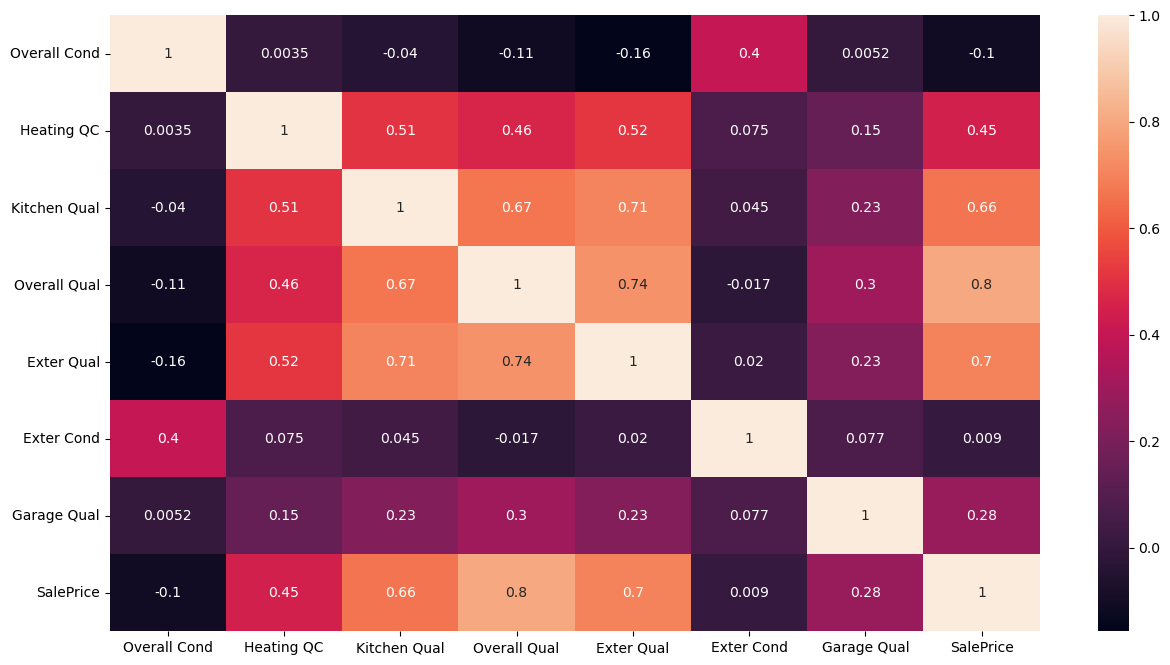

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(qualitynum_data_numeric.corr(), annot =True)

Based on the correlation analysis, Overall Quality is highly correlated to External Quality. As well as Kitchen Quality is 0.71 correlated to External Qualtiy.

# Bivariate Analysis of Sale Price vs Overall Condition

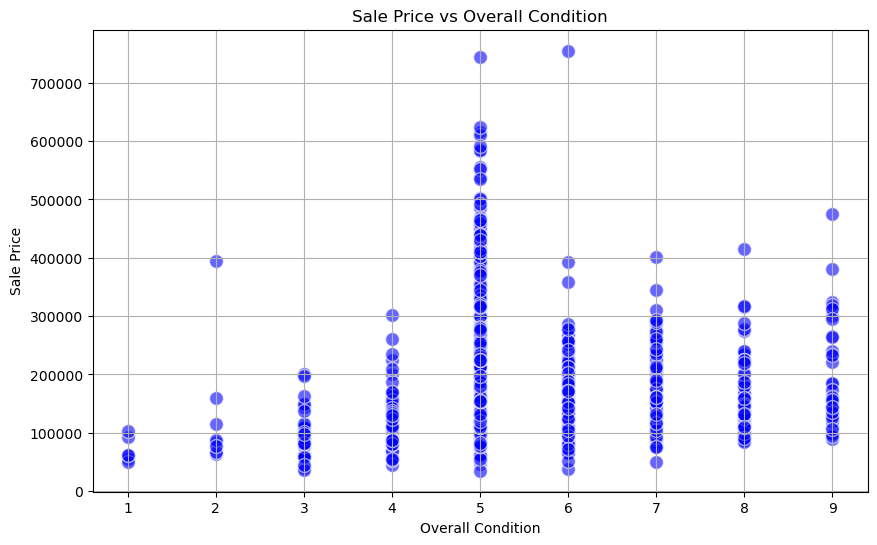

In [20]:
plt.figure(figsize=[10,6])
plt.scatter(qualitynum_data['Overall Cond'], qualitynum_data['SalePrice'], alpha=0.6, c='blue', edgecolors='white', s=100)
plt.title('Sale Price vs Overall Condition')
plt.xlabel('Overall Condition')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

In [21]:
# We group the data based on 'OverallQual' and calculate the average 'SalePrice' for each group
average_price_per_quality = qualitynum_data.groupby('Overall Cond')['SalePrice'].mean()

# Print the result
print(average_price_per_quality)


Overall Cond
1     70811.500000
2    130979.000000
3     97433.378378
4    120706.156627
5    206095.201967
6    150171.368171
7    154279.246835
8    153221.086957
9    200047.222222
Name: SalePrice, dtype: float64


In [22]:
#As we see above Overall Quality 5 has a higher average then better quality houses, which reinforces the fact
#..that this variable is not a good predictor variable for SalePrice

In [23]:
qualitynum_data_numeric.describe()

,Overall Cond,Heating QC,Kitchen Qual,Overall Qual,Exter Qual,Exter Cond,Garage Qual,SalePrice
count,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000
mean,5.570392,4.156570,3.514078,6.095990,3.395051,3.090444,2.799061,181036.995307
std,1.118728,0.952912,0.666091,1.412009,0.579263,0.370040,0.714569,79576.816701
min,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000,34900.000000
25%,5.000000,3.000000,3.000000,5.000000,3.000000,3.000000,3.000000,129500.000000
50%,5.000000,5.000000,3.000000,6.000000,3.000000,3.000000,3.000000,161000.000000
75%,6.000000,5.000000,4.000000,7.000000,4.000000,3.000000,3.000000,213492.500000
max,9.000000,5.000000,5.000000,10.000000,5.000000,5.000000,5.000000,755000.000000


# Bivariate Analysis of Overall Quality and YearRemodAdd

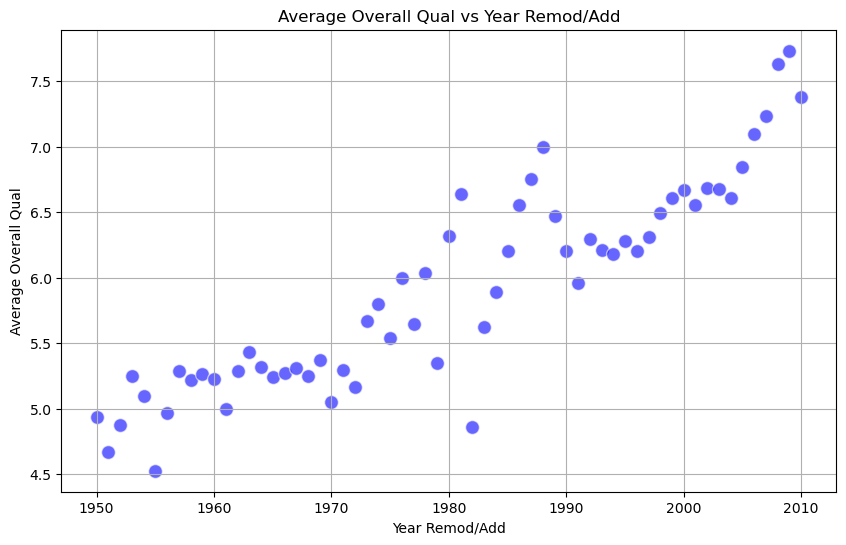

In [24]:
#We conducted a Biviriate Analysis to confirm our initial hypothesis the average overall quality
#..increase the latest year the property was developed
data2 = data[['Overall Qual', 'Year Remod/Add']].copy()

# Calculate the average 'Overall Qual' for each 'Year Remod/Add'
average_qual_per_year = data2.groupby('Year Remod/Add')['Overall Qual'].mean().reset_index()

# Plotting
plt.figure(figsize=[10, 6])
plt.scatter(average_qual_per_year['Year Remod/Add'], average_qual_per_year['Overall Qual'], alpha=0.6, c='blue', edgecolors='white', s=100)
plt.title('Average Overall Qual vs Year Remod/Add')
plt.xlabel('Year Remod/Add')
plt.ylabel('Average Overall Qual')
plt.grid(True)
plt.show()


In [32]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# We decide to calculate the Pearson correlation coefficient to determine the relationship of these two variables
correlation, _ = pearsonr(average_qual_per_year['Year Remod/Add'], average_qual_per_year['Overall Qual'])
print(f'Pearson correlation coefficient: {correlation}')

X = average_qual_per_year[['Year Remod/Add']]  # Predictor variable
y = average_qual_per_year['Overall Qual']  # Response variable

model = LinearRegression().fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_

# Display the linear model equation
print(f'Linear model equation: y = {slope:.4f}x + {intercept:.4f}')


Pearson correlation coefficient: 0.9058120586209198
Linear model equation: y = 0.0398x + -72.9519


## Quality and Conditions Dimension

In [35]:
#All the quality and condition variables were tested
qc_data = data[['Heating QC','Kitchen Qual','Overall Qual','Exter Qual']].copy()

In [36]:
qc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Heating QC    2344 non-null   object
 1   Kitchen Qual  2344 non-null   object
 2   Overall Qual  2344 non-null   int64 
 3   Exter Qual    2344 non-null   object
dtypes: int64(1), object(3)
memory usage: 73.4+ KB


In [37]:
for column in qc_data.columns:
    unique_values = qc_data[column].unique()
    print(f"{column}: {unique_values}\n")

Heating QC: ['Ex' 'TA' 'Gd' 'Fa']

Kitchen Qual: ['TA' 'Gd' 'Ex' 'Fa' 'Po']

Overall Qual: [ 5  6  9  7  4  2  8  3 10  1]

Exter Qual: ['TA' 'Ex' 'Gd' 'Fa']



In [38]:
#Categorical data such as Heating QC, Kitchen Qual, and Exter Qual is transformed to Ordinal-Numerical based on the mapping
#...found below. 

qualitynum_data = pd.DataFrame(qc_data)
quality_mapping = {
    'Ex': 5,  # Excellent
    'Gd': 4,  # Good
    'TA': 3,  # Average/Typical
    'Fa': 2,  # Fair
    'Po': 1,  # Poor
    'NA': 0,  # No Basement
    np.nan: 0  # Assuming you want to treat NaN as 0 or you could exclude it if NaN handling is different
}
qualitynum_data_numeric = qualitynum_data.applymap(lambda x: quality_mapping.get(x, x))
print(qualitynum_data_numeric)



      Heating QC  Kitchen Qual  Overall Qual  Exter Qual
0              5             3             5           3
1              5             3             5           3
2              3             3             6           3
3              3             3             5           3
4              5             3             5           3
...          ...           ...           ...         ...
2339           4             3             5           3
2340           5             3             7           4
2341           3             3             6           3
2342           5             3             6           3
2343           2             3             6           3

[2344 rows x 4 columns]


<Axes: >

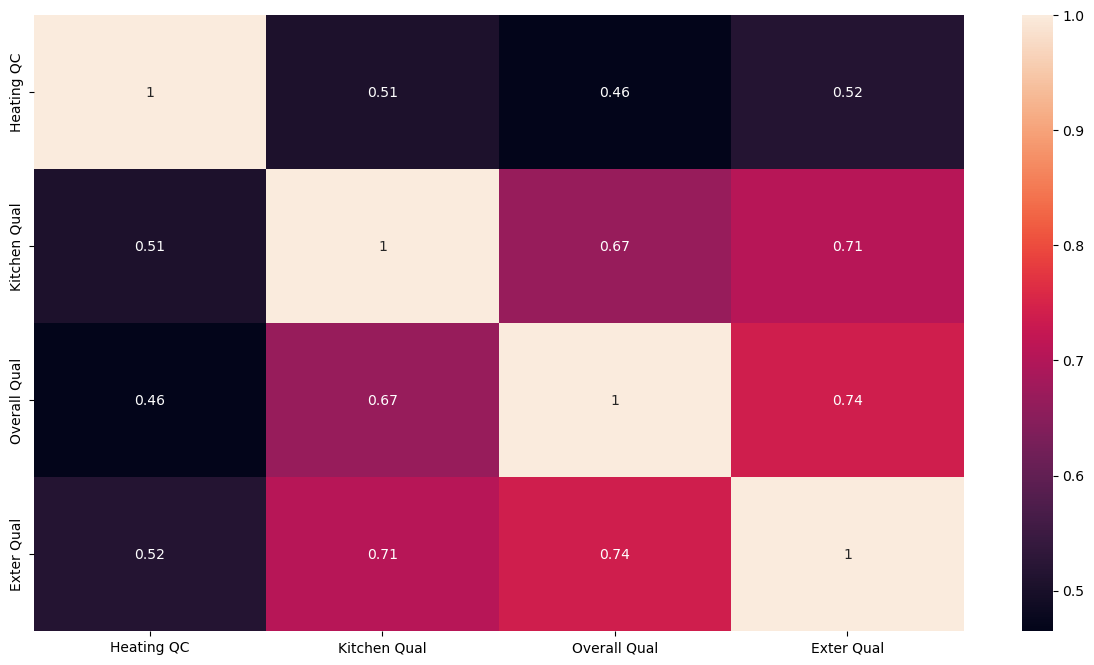

In [39]:
plt.figure(figsize=(15,8))
sns.heatmap(qualitynum_data_numeric.corr(), annot =True)

## Features Dimension

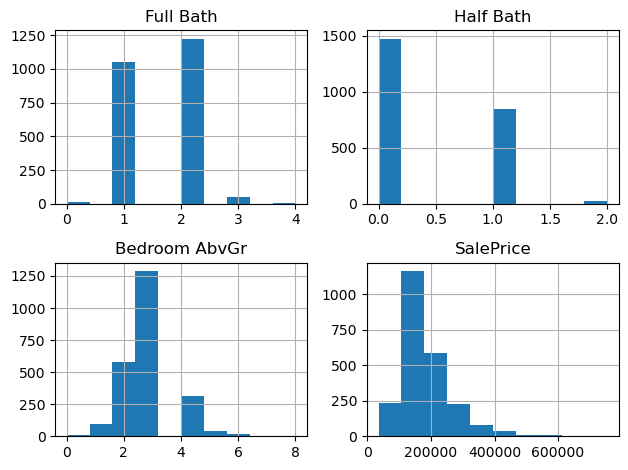

In [40]:
features_data = data[[
    'Full Bath',
    'Half Bath',
    'Bedroom AbvGr',
    'Central Air',
    'Neighborhood',
    'Bldg Type',
    'SalePrice'
]].copy()

features_data.fillna(0, inplace=True)
features_data.hist()
plt.tight_layout()

In [41]:
features_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Full Bath      2344 non-null   int64 
 1   Half Bath      2344 non-null   int64 
 2   Bedroom AbvGr  2344 non-null   int64 
 3   Central Air    2344 non-null   object
 4   Neighborhood   2344 non-null   object
 5   Bldg Type      2344 non-null   object
 6   SalePrice      2344 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 128.3+ KB


In [42]:
for column in features_data.columns:
    unique_values = features_data[column].unique()
    print(f"{column}: {unique_values}\n")

Full Bath: [1 2 3 4 0]

Half Bath: [1 0 2]

Bedroom AbvGr: [3 4 2 1 6 0 5 8]

Central Air: ['Y' 'N']

Neighborhood: ['NAmes' 'MeadowV' 'NWAmes' 'Edwards' 'OldTown' 'IDOTRR' 'SWISU' 'CollgCr'
 'NridgHt' 'BrDale' 'SawyerW' 'BrkSide' 'Timber' 'Somerst' 'Sawyer'
 'Mitchel' 'NoRidge' 'NPkVill' 'ClearCr' 'Gilbert' 'Crawfor' 'StoneBr'
 'Blmngtn' 'Veenker' 'Greens' 'GrnHill' 'Landmrk' 'Blueste']

Bldg Type: ['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex']

SalePrice: [149900 127000 128000 108480  90000 174000 335000  94000 111750 175000
 137000  80000 128900  60000 215700  46500 150000 164990 118000 213000
 228950  86900 405749  87000 151000 122500 148000 179900 582933  98300
 168500 124500 215000 185000 160250 584500 280000 110000 154000 167900
 260000 143750 190000 195500 264966 240000 131500 197000  97500 161750
 269500 144800 171500 191000 279000 124000  88000 134500 201490 142500
  99500 167300 239500 136500 220000 192000 172000 145000 110500 441929
 133000 165000 176000 114500 164000 135500 1

In [43]:
# Convert to binary
features_data['Central Air'] = features_data['Central Air'].map({'Y': 1, 'N': 0})
features_data['Bldg Type'] = features_data['Bldg Type'].map({'1Fam': 1, 'TwnhsE': 2, 'Twnhs': 3, '2fmCon': 4, 'Duplex': 4})

# For nominal variables, use get_dummies for one-hot encoding
neighborhood_dummies = pd.get_dummies(features_data['Neighborhood'], prefix='Neighborhood')

# Now drop the original columns and concatenate the new dummy dataframes to the original dataframe
features_data.drop(['Neighborhood'], axis=1, inplace=True)  # Combined drop statements for efficiency
features_data_numerical = pd.concat([features_data, neighborhood_dummies], axis=1)


In [44]:
features_data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Full Bath             2344 non-null   int64
 1   Half Bath             2344 non-null   int64
 2   Bedroom AbvGr         2344 non-null   int64
 3   Central Air           2344 non-null   int64
 4   Bldg Type             2344 non-null   int64
 5   SalePrice             2344 non-null   int64
 6   Neighborhood_Blmngtn  2344 non-null   uint8
 7   Neighborhood_Blueste  2344 non-null   uint8
 8   Neighborhood_BrDale   2344 non-null   uint8
 9   Neighborhood_BrkSide  2344 non-null   uint8
 10  Neighborhood_ClearCr  2344 non-null   uint8
 11  Neighborhood_CollgCr  2344 non-null   uint8
 12  Neighborhood_Crawfor  2344 non-null   uint8
 13  Neighborhood_Edwards  2344 non-null   uint8
 14  Neighborhood_Gilbert  2344 non-null   uint8
 15  Neighborhood_Greens   2344 non-null   uint8
 16  Neighb

In [45]:
features_data_corr = features_data_numerical[[
    'Full Bath',
    'Half Bath',
    'Bedroom AbvGr',
    'Central Air',
    'Bldg Type',
    'SalePrice'
]].copy()



<Axes: >

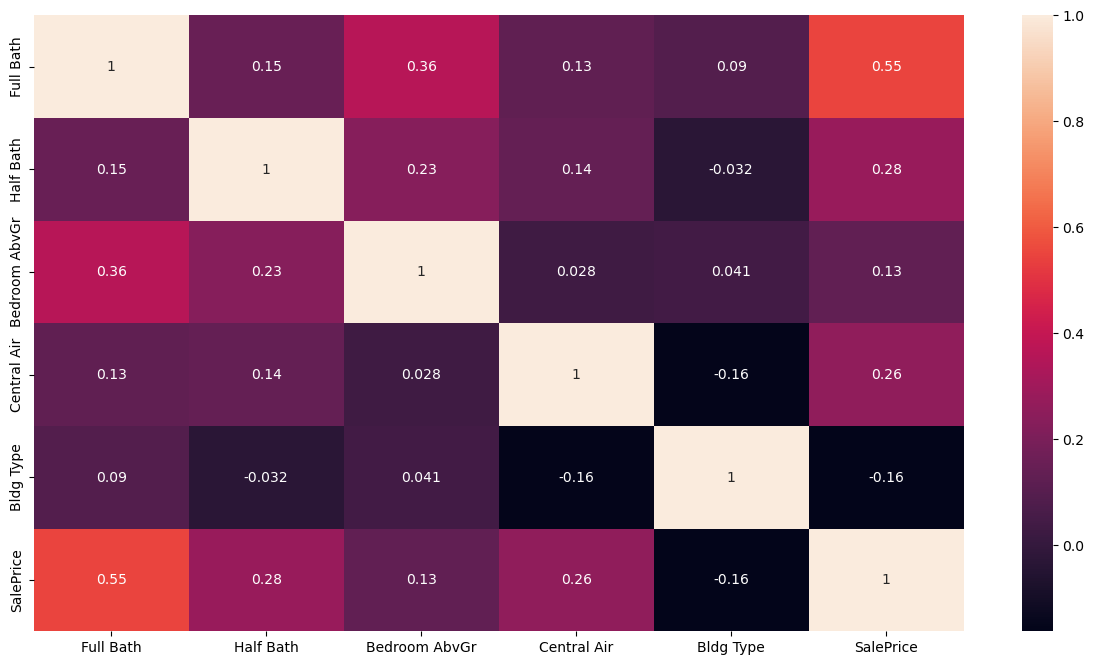

In [46]:
plt.figure(figsize=(15,8))
sns.heatmap(features_data_corr.corr(), annot =True)

In [47]:
year_data = data[[
    'Year Built',
    'Year Remod/Add',
    'Garage Yr Blt',
    'Yr Sold',
    'SalePrice'
]].copy()

<Axes: >

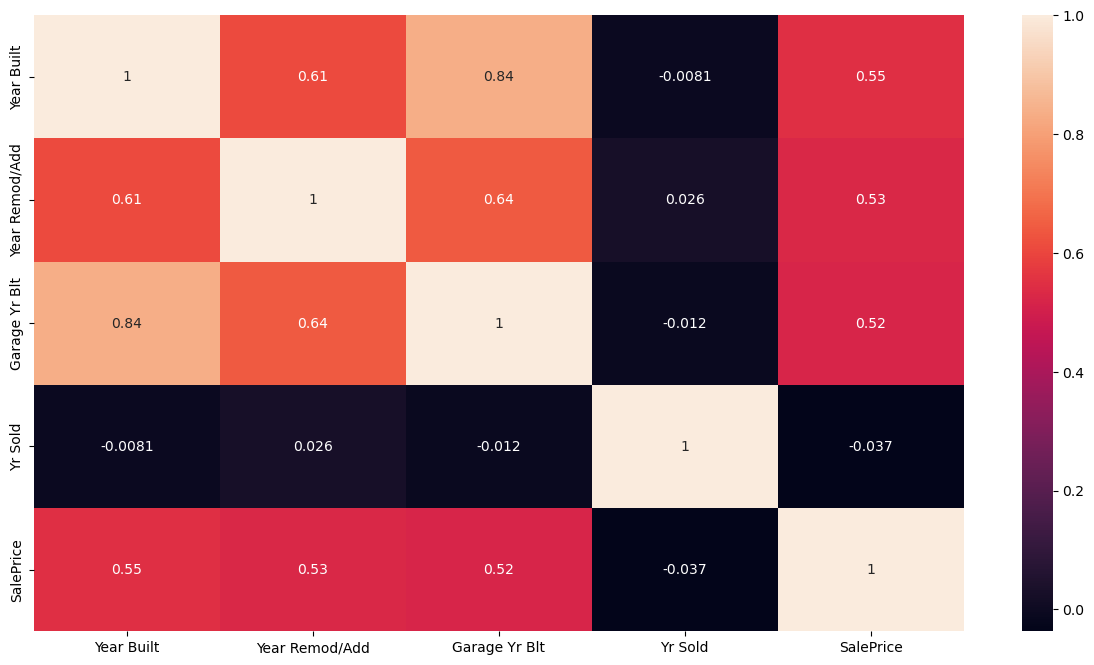

In [48]:
plt.figure(figsize=(15,8))
sns.heatmap(year_data.corr(), annot =True)